In [54]:
import pandas as pd
import numpy as np
import scanpy as sc
%matplotlib inline
from matplotlib import pyplot as plt
import Levenshtein
import matplotlib as mpl
import seaborn as sns
import autoreload
import scipy
params = {
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 10,
    'font.family': "Helvetica",
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 100
   }

mpl.rcParams.update(params)

sns.set_style("ticks")
sns.set_context(context='paper')
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0, "transparent": False}
mpl.rc('savefig', dpi=300)
output_dir='figures/hypermutation'
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20) 
pd.set_option('display.width', 100)

def tissue_colors():
    
    tissue_color_dict = {'Bladder': '#e7969c',
             'Blood': '#d6616b',
             'Bone_Marrow': '#cedb9c',
             'Eye': '#c7ea46',#"#00ff7f",
             'Fat': '#e7cb94',
             'Heart': '#ff0800',
             'Kidney': '#7b4173',
             'Large_Intestine': '#31a354',
             'Liver': '#000080',
             'Lung': '#3182bd',
             'Lymph_Node': '#8c6d31',
             'Mammary':'#ce6dbd',
             'Muscle': '#e7ba52',
             'Pancreas': '#fd8d3c',
             'Prostate':'#637939',#'#a55194',#
             'Salivary_Gland':'#622a0f',
             'Skin': '#de9ed6',
             'Small_Intestine': '#6baed6',
             'Spleen': '#393b79',
             'Thymus': '#9c9ede',
             'Tongue':'#b5cf6b',
             'Trachea': '#969696',
             'Uterus':'#c64b8c',#'#ff0090',
             'Vasculature': '#843c39'}


airr = pd.read_table('../data/merged_airr.tsv')

ig = airr[airr.locus.str.contains('IG')]

In [60]:
ig

,sequence_id,sequence,locus,stop_codon,vj_in_frame,productive,rev_comp,v_call,d_call,j_call,...,libraryplate,well,notes,seqrun,cell_identifier,n_counts,n_genes,_cell_id,distance_to_germline_v,v_mu_freq
0,AAAGTAGGTGTGGCTC-1_contig_1_TSP2_BM_vertebralb...,TGGGGGTAGCTCAGGAAGCAGAGCCTGGAGCATCTCCACTATGGCC...,IGL,F,T,T,F,IGLV6-57*01,NaN,IGLJ3*02,...,NaN,NaN,5prime,2.0,AAAGTAGGTGTGGCTC_TSP2_BM_vertebralbody_10X_2_2...,15471.0,1484,AAAGTAGGTGTGGCTC_TSP2_BM_vertebralbody_10X_5prime,31,0.109929
1,AAAGTAGGTGTGGCTC-1_contig_1_TSP2_BM_vertebralb...,GGGGGGTAGCTCAGGAAGCAGAGCCTGGAGCATCTCCACTATGGCC...,IGL,F,T,T,F,IGLV6-57*01,NaN,IGLJ3*02,...,NaN,NaN,5prime,2.0,AAAGTAGGTGTGGCTC_TSP2_BM_vertebralbody_10X_2_2...,15471.0,1484,AAAGTAGGTGTGGCTC_TSP2_BM_vertebralbody_10X_5prime,31,0.109929
2,AACTCAGCAGCCAATT-1_contig_1_TSP2_BM_vertebralb...,TGGGGGCGCCAGGGGTCCCTTCCAATATCAGCACCATGGCCTGGAC...,IGL,F,T,T,F,IGLV7-43*01,NaN,IGLJ3*02,...,NaN,NaN,5prime,2.0,AACTCAGCAGCCAATT_TSP2_BM_vertebralbody_10X_1_2...,16216.0,3780,AACTCAGCAGCCAATT_TSP2_BM_vertebralbody_10X_5prime,22,0.076389
3,AACTCAGCAGCCAATT-1_contig_2_TSP2_BM_vertebralb...,TGGGGATCATCCAACAACCACATCCCTTCTCTACAGAAGCCTCTGA...,IGH,F,T,T,F,IGHV1-46*01,"IGHD2-15*01,IGHD2-21*01,IGHD2-21*02",IGHJ4*02,...,NaN,NaN,5prime,2.0,AACTCAGCAGCCAATT_TSP2_BM_vertebralbody_10X_1_2...,16216.0,3780,AACTCAGCAGCCAATT_TSP2_BM_vertebralbody_10X_5prime,33,0.111486
6,AAGTCTGAGTGAAGTT-1_contig_1_TSP2_BM_vertebralb...,GGGGGAGCATCACCCAGCAACCACATCTGTCCTCTAGAGAATCCCC...,IGH,F,T,T,F,"IGHV1-2*02,IGHV1-2*07,IGHV1/OR15-1*04",IGHD6-6*01,IGHJ3*02,...,NaN,NaN,5prime,2.0,AAGTCTGAGTGAAGTT_TSP2_BM_vertebralbody_10X_2_2...,21723.0,1999,AAGTCTGAGTGAAGTT_TSP2_BM_vertebralbody_10X_5prime,42,0.141892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,ATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGGTGGAGTCTGGGG...,IGH,F,T,T,F,IGHV3-15*01,"IGHD3-10*01,IGHD3-10*02",IGHJ4*02,...,B003956,K7,LinNegMarrowCD38,NaN,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,2161379.0,2274,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,14,0.046358
1628,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,CCTGACAGTAATAGTCAGCCTCAGCCATGGCATGGATCCCTCTCTT...,IGL,F,T,T,F,IGLV3-1*01,NaN,IGLJ3*02,...,B003956,K7,LinNegMarrowCD38,NaN,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,2161379.0,2274,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,7,0.024911
1629,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,GCTCCAACTATGGGAAAACAGCCACTCTGAACATCATCGGGAACCA...,IGL,F,T,T,F,IGLV3-1*01,NaN,IGLJ3*02,...,B003956,K7,LinNegMarrowCD38,NaN,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,2161379.0,2274,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,9,0.095745
1630,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,CACGCTGCTGAGGGAGTAGAGTCTTGGACCTCCTGTGCAAGAACAT...,IGH,F,T,T,F,IGHV4-31*03,IGHD3-9*01,IGHJ6*02,...,B003956,G9,LinNegMarrowCD38,NaN,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,2683127.0,2680,TSP11_BM_NA_SS2_B134009_B003956_LinNegMarrowCD...,25,0.083612


In [55]:
def calculate_v_mu_freq(df):
    df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)


    df['v_mu_freq'] = df['distance_to_germline_v'] / df['v_sequence_alignment'].str.len()
    return df

igh = calculate_v_mu_freq(ig)

<ipython-input-55-de4e25ae2bd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)
<ipython-input-55-de4e25ae2bd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v_mu_freq'] = df['distance_to_germline_v'] / df['v_sequence_alignment'].str.len()


In [56]:
color_dict = tissue_colors()

In [57]:
def plot_ecdf(parameter, hue, mincounts, ):
    hue = 'tissue'
    sel = igh_filtered[hue].value_counts() > mincounts

    data = igh_filtered[igh_filtered.tissue.isin(sel[sel].index)]

    sns.displot(data, y = data['v_mu_freq'], kind='ecdf', hue='tissue', palette = color_dict, complementary = True)

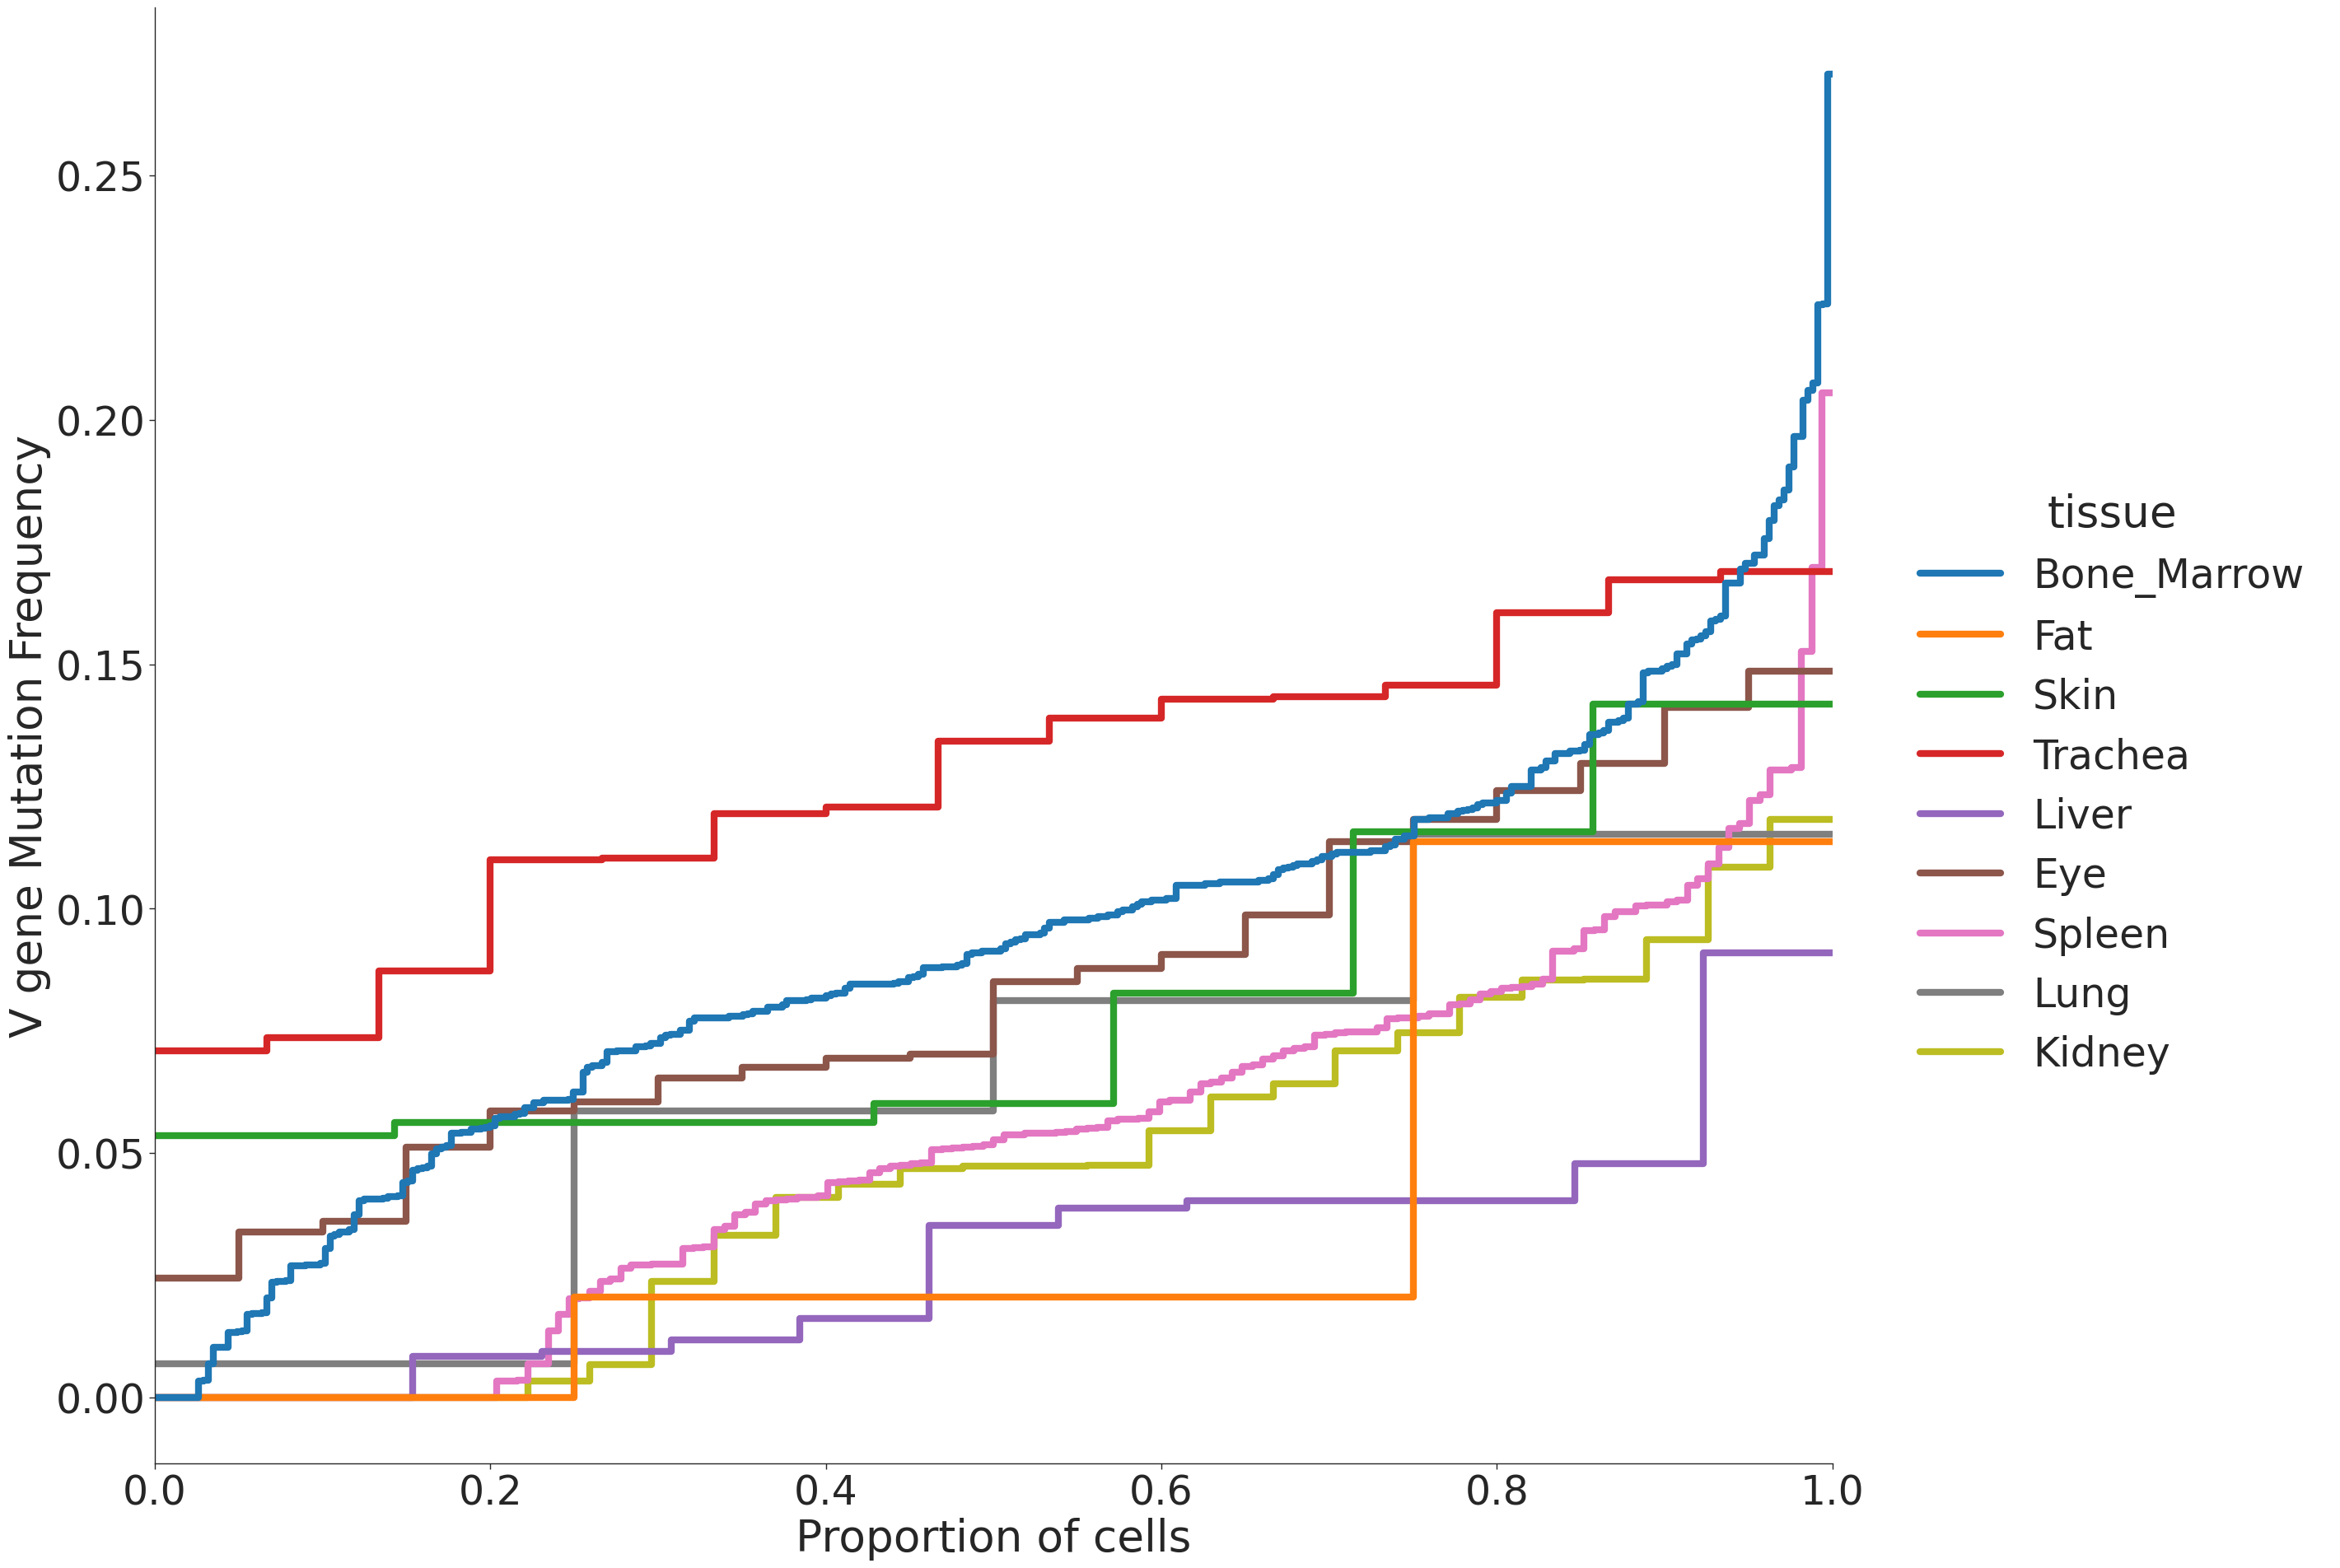

In [58]:
sns.set_context("paper", font_scale=4, rc={"lines.linewidth":6})
hue = 'tissue'
kind = 'ecdf'
x = 'v_mu_freq'
sel = igh_filtered[hue].value_counts() > 2
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]

g = sns.displot(data, y = data[x], kind=kind, hue=hue, palette=tissue_colors(), height=20, aspect=1.2)

g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))
g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')


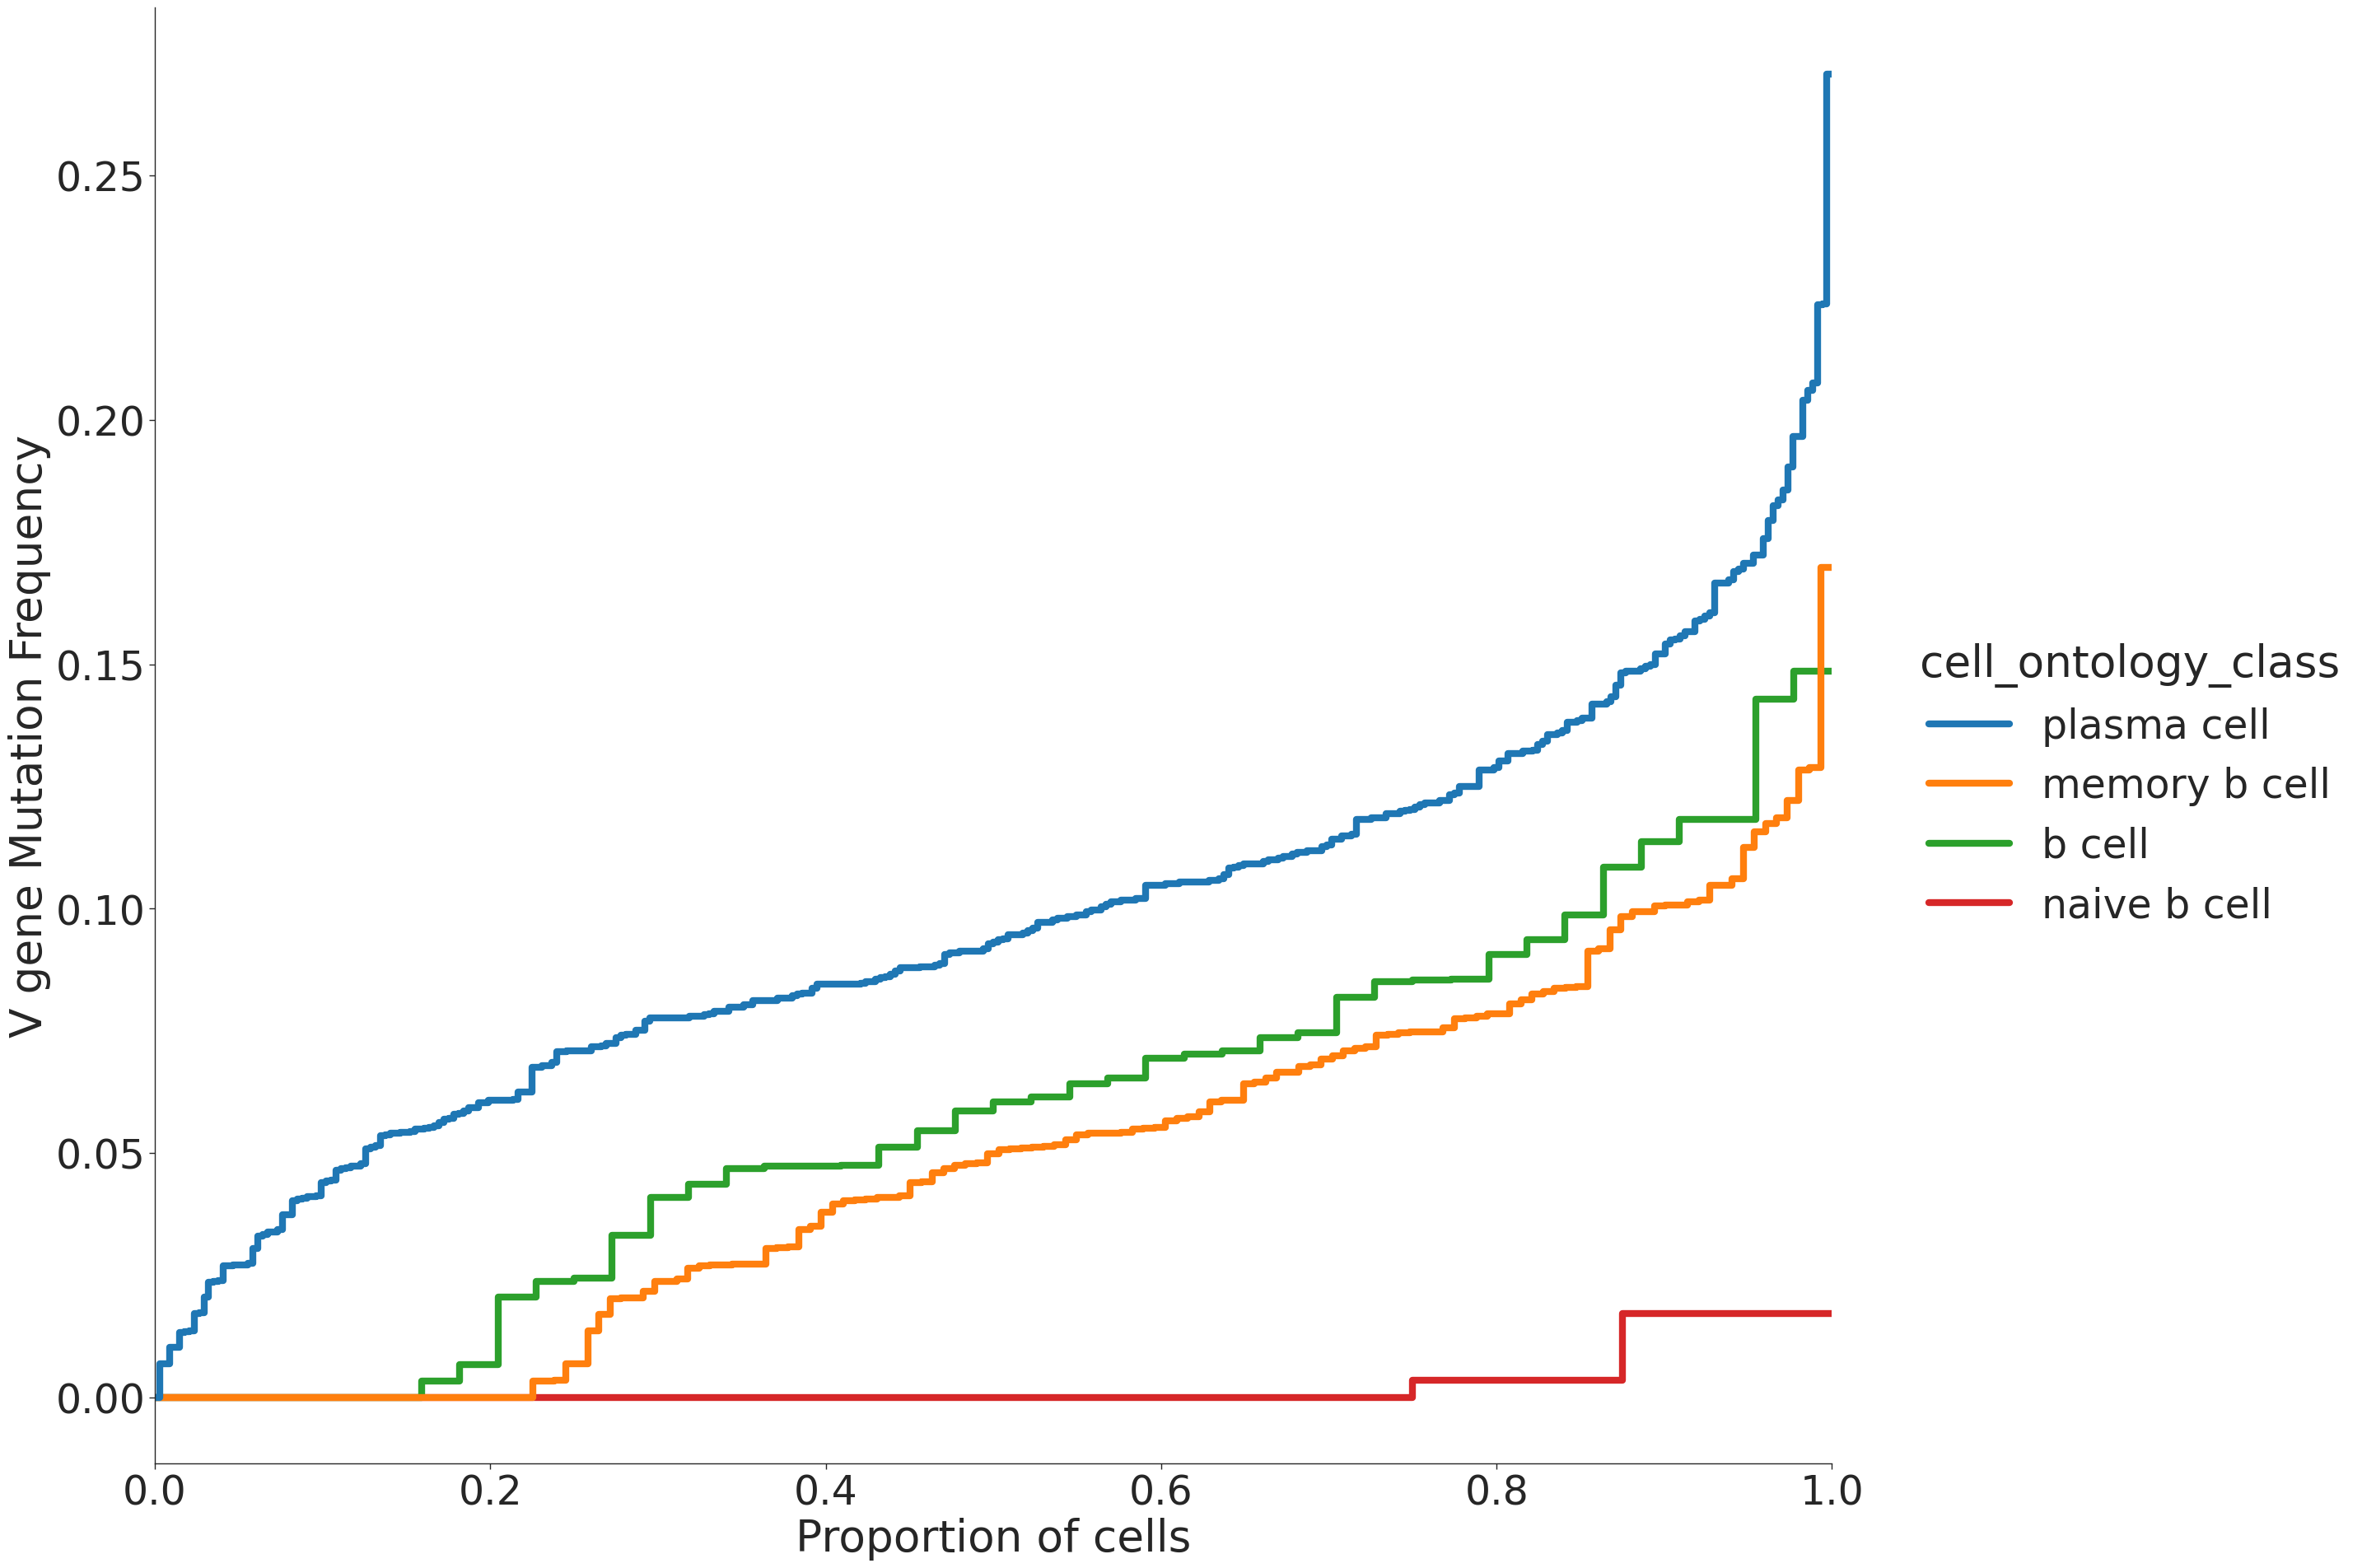

In [59]:
cell_label = 'cell_ontology_class'
bcell_filter = 'b cell|plasma cell'
hue = cell_label
kind = 'ecdf'
mu_freq = 'v_mu_freq'
sel = igh_filtered[hue].value_counts() > 5
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]
data = data[data[cell_label].str.contains(bcell_filter)]
g = sns.displot(data, y = data[x], kind=kind, hue=hue, height=20, aspect=1.2)

g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))
g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')

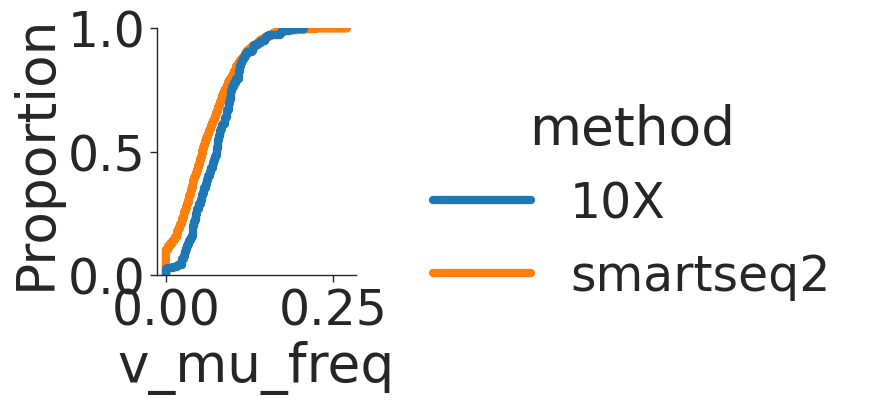

In [15]:
hue = 'method'
kind = 'ecdf'
x = 'v_mu_freq'
sel = igh_filtered[hue].value_counts() > 6
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]

g = sns.displot(data, x = data[x], kind=kind, hue=hue)
g.savefig('{}_{}_{}.pdf'.format(x, kind,hue))

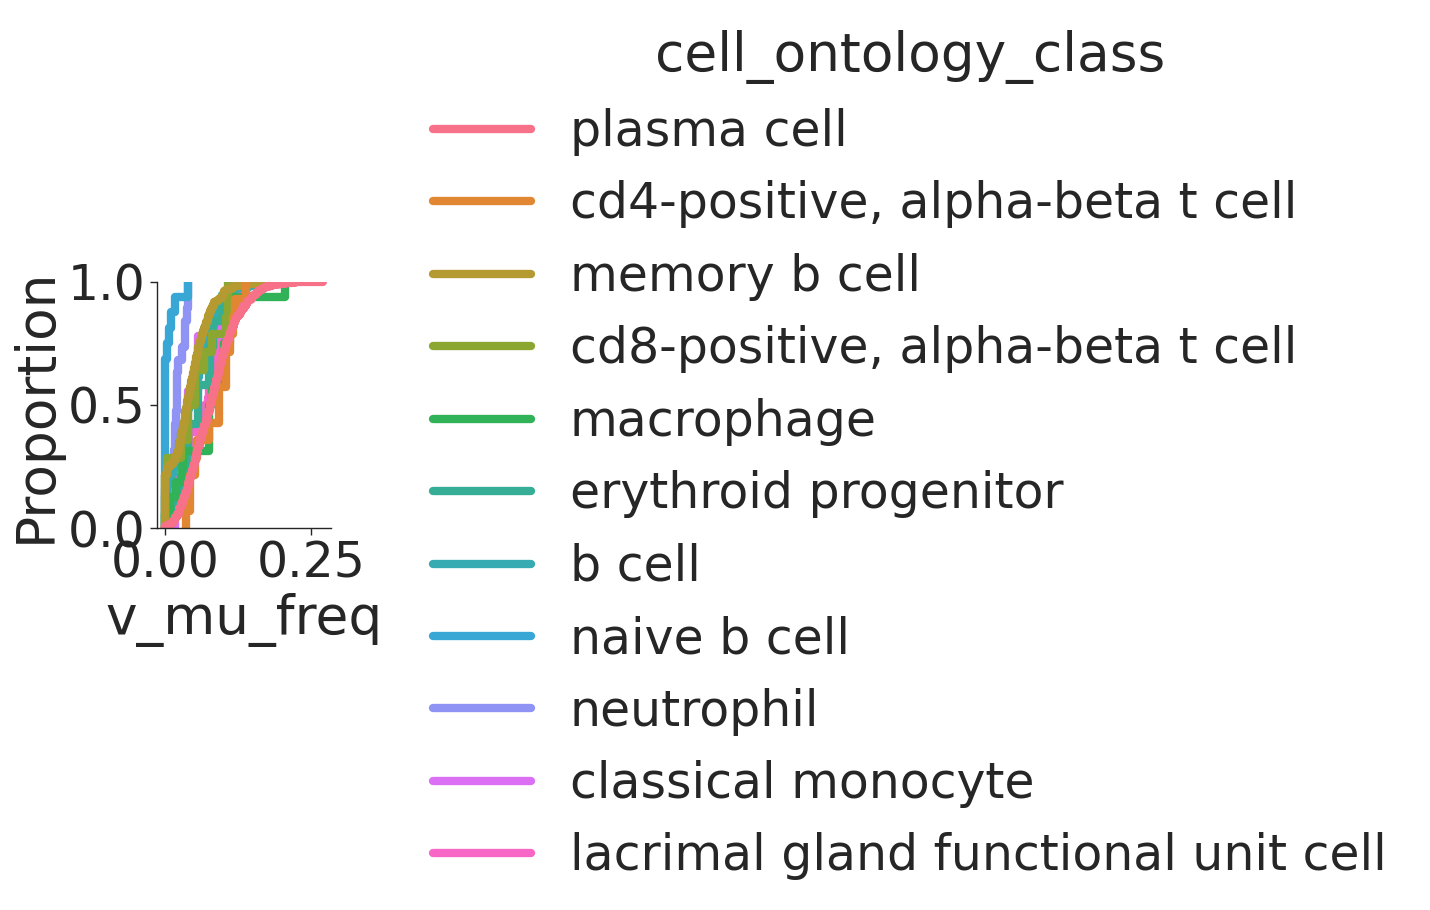

In [16]:
hue = 'cell_ontology_class'
kind = 'ecdf'
x = 'v_mu_freq'
sel = igh_filtered[hue].value_counts() > 6
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]

g = sns.displot(data, x = data[x], kind=kind, hue=hue)
g.savefig('{}_{}_{}.pdf'.format(x, kind,hue))

In [17]:

def plot_ecdf(df, hue, x, min_counts):
    sel = df[hue].value_counts() > min_counts
    data = df[df[hue].isin(sel[sel].index)]

    g = sns.displot(data, x = data[x], kind=kind, hue=hue)
    return g

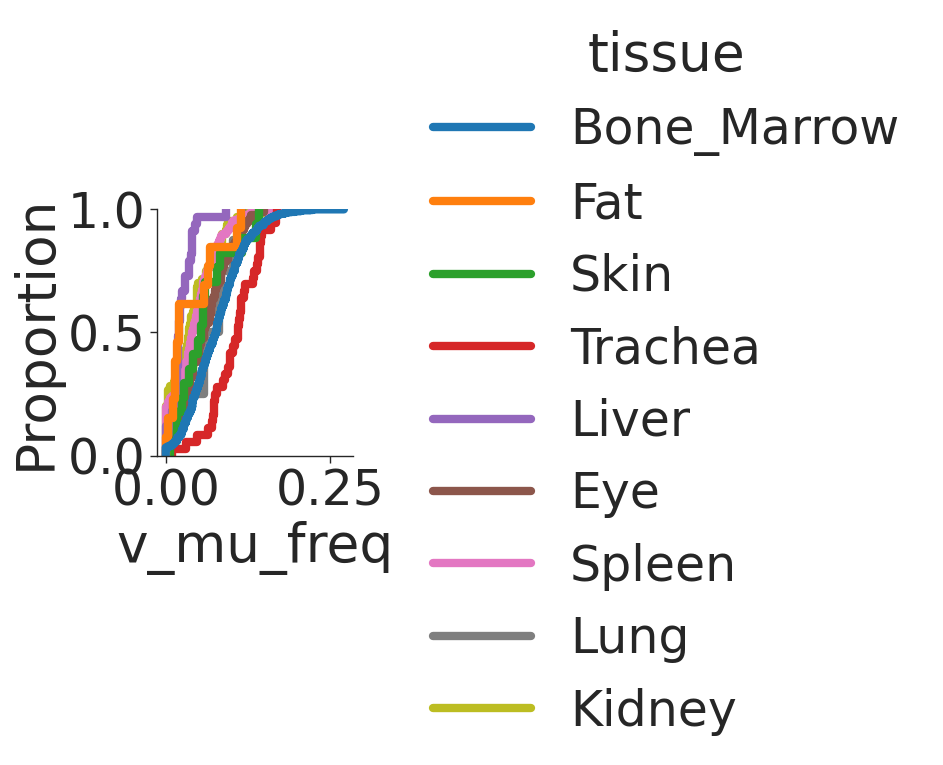

In [18]:

plot_ecdf(igh_filtered, 'tissue', 'v_mu_freq', 5)